# Importing our packages / dataset

In [1]:
# Importing Packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#Data and analysis
import scipy as sp
import os
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import random
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in versi

In [2]:
# Importing our dataset
df = pd.read_csv("clean_dataset.csv")
df.head()

,Unnamed: 0,Title,Company,Description,Salary,City,State,Pincode,Source
0,0,Data Analyst,Seen by Indeed,With one application you can be considered for...,NaN,Seattle,WA,NaN,Indeed
1,1,Business Analyst,Microsoft6,Microsoft Cloud Hardware Infrastructure and En...,NaN,Redmond,WA,NaN,Indeed
2,2,ML Data Associate III,Amazon.com Services LLC46,Basic Qualifications\nBachelors degree or comm...,NaN,Seattle,WA,NaN,Indeed
3,3,Data Analyst,Gupta Media,Gupta Media is looking for a Data Analyst to j...,NaN,Boston,MA,2116,Indeed
4,4,Implementation Specialist / Business Analyst,ScerIS,ScerIS is looking to add experienced and entry...,92500.0,Marlborough,MA,1752,Indeed


In [3]:
# We will create a salary dataset where there are no null values
salary_data = df[df['Salary'].notnull()]

In [4]:
# Drop the redundant cells
salary_data.drop(['Unnamed: 0','Pincode'],axis=1,inplace=True)

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# EDA

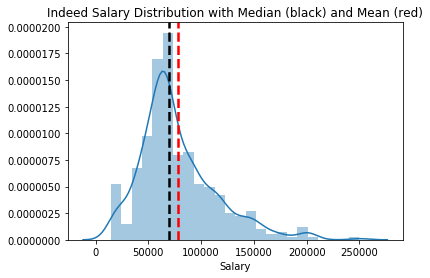

In [5]:
# Let's look at the salary distribution, mean, median values
sal_plot = salary_data[salary_data["Salary"].notnull()]
ax = sns.distplot(salary_data["Salary"])
ax.axvline(salary_data["Salary"].median(), lw=2.5, ls='dashed', color='black')
ax.axvline(salary_data["Salary"].mean(), lw=2.5, ls='dashed', color='red')
plt.title('Indeed Salary Distribution with Median (black) and Mean (red)');

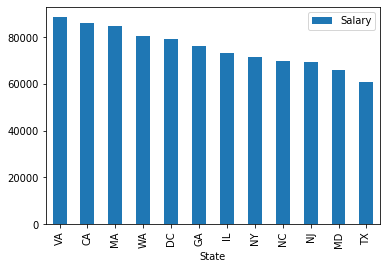

In [6]:
# Salaries per State
salary_data.groupby(['State']).mean().sort_values("Salary", ascending = False).plot.bar();

## Creating our new salary - Above Median and Below Median

In [7]:
# Create a new column stating high salary for anything above the median
salary_data['High Salary'] = salary_data.apply(lambda x: 1 if x['Salary'] > salary_data["Salary"].median() else 0,axis=1)

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


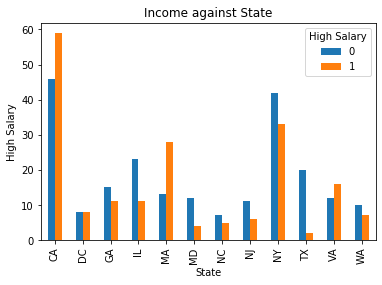

In [8]:
#determining if a variable is good predictor of salary through plots
pd.crosstab(salary_data['State'],salary_data['High Salary']).plot(kind='bar');
plt.title('Income against State');
plt.xlabel('State');
plt.ylabel('High Salary');

# Feature Engineering

## Creating Titles 

In [9]:
def title_function(x):
    if "data scientist" in x or "scien" in x or "machine learning" in x or "ml" in x or "statist" in x or "a.i" in x or "artificial" in x or "nlp" in x or "natural language" in x or "deep learning" in x:
        return "data scientist"
    elif "data analyst" in x or "data" in x:
        return "data analyst"
    elif "business analyst" in x or "business" in x or "intelligence" in x or "bi" in x:
        return "business analyst"
    elif "market" in x:
        return "marketing analyst"
    elif "financ" in x:
        return "financial analyst"
    else: return "others"

salary_data["Modified Title"] = salary_data["Title"].str.lower().apply(title_function)

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
salary_data['Modified Title'].value_counts()

others               131
business analyst     130
data analyst          86
data scientist        32
financial analyst     17
marketing analyst     13
Name: Modified Title, dtype: int64

## Skills

### Technology

In [11]:
# Create a counter function for the entire dataset
def countkeywords(keyword):
    num = [str(row).lower().count(keyword) for row in salary_data['Description']]
    return keyword,sum(num)

In [12]:
# Creating a customized list of technology skills
technology_skills_list = ['python', ' r ','sql','java','scala','excel',
                          'aws','hadoop','spark','tableau','sas','c++',
                          'linux','hive','oracle','perl','mysql','matlab',
                          'html','tensorflow','spss','mongodb']

In [13]:
# Checking count
technology_skills = []
for word in technology_skills_list:
     technology_skills.append(countkeywords(str(word)))

In [14]:
# Creating our technology skill column
technology_skill = []

for i in range(len(technology_skills)):
    technology_skill.append(technology_skills[i][0])
    
# Creating our technology skill frequency column
technology_skill_freq = []

for i in range(len(technology_skills)):
    technology_skill_freq.append(technology_skills[i][1])
    
# Creating our technology skill dataframe
tech_skills_df = {'Technology_Skill':technology_skill,'Frequency':technology_skill_freq}
tech_skills = pd.DataFrame(tech_skills_df)
tech_skills = tech_skills.sort_values(['Frequency'],ascending=False).reset_index(drop=True)

tech_skills[tech_skills['Frequency'] >= 10]

,Technology_Skill,Frequency
0,excel,444
1,sql,306
2,aws,110
3,python,102
4,tableau,80
5,sas,71
6,java,58
7,scala,54
8,oracle,33
9,mysql,17


In [15]:
salary_data['SQL'] = salary_data["Description"].str.lower().str.contains("sql").astype(int)
salary_data['Python'] = salary_data["Description"].str.lower().str.contains("python").astype(int)
salary_data['Tableau'] = salary_data["Description"].str.lower().str.contains("tableau").astype(int)
salary_data['Excel'] = salary_data["Description"].str.lower().str.contains("excel").astype(int)
salary_data['Scala'] = salary_data["Description"].str.lower().str.contains("scala").astype(int)
salary_data['Java'] = salary_data["Description"].str.lower().str.contains("java").astype(int)
salary_data['Oracle'] = salary_data["Description"].str.lower().str.contains("oracle").astype(int)
salary_data['Hadoop'] = salary_data["Description"].str.lower().str.contains("hadoop").astype(int)
salary_data['Tensorflow'] = salary_data["Description"].str.lower().str.contains("tensorflow").astype(int)
salary_data['AWS'] = salary_data["Description"].str.lower().str.contains("aws").astype(int)
salary_data['SPSS'] = salary_data["Description"].str.lower().str.contains("spss").astype(int)
salary_data['R'] = salary_data["Description"].str.lower().str.contains("r").astype(int)
salary_data['Hive'] = salary_data["Description"].str.lower().str.contains("hive").astype(int)
salary_data['Linux'] = salary_data["Description"].str.lower().str.contains("linux").astype(int)
salary_data['MySQL'] = salary_data["Description"].str.lower().str.contains("mysql").astype(int)
salary_data['Spark'] = salary_data["Description"].str.lower().str.contains("spark").astype(int)
salary_data['SAS'] = salary_data["Description"].str.lower().str.contains("sas").astype(int)

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [16]:
# Create a column for count of technology skills
salary_data['Technology_Skills_Count'] = salary_data['SQL'] + salary_data['Python'] + salary_data['Tableau'] + salary_data['Excel'] + salary_data['Scala'] + salary_data['Java'] + salary_data['Oracle'] + salary_data['Hadoop'] + salary_data['Tensorflow'] + salary_data['AWS'] + salary_data['SPSS'] + salary_data['R'] + salary_data['Hive'] + salary_data['Linux'] + salary_data['MySQL'] + salary_data['Spark'] + salary_data['SAS']   

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
salary_data.drop(['SQL','Python','Tableau','Excel','Scala','Java','Oracle','Hadoop','Tensorflow','AWS','SPSS','R',
                 'Hive','Linux','MySQL','Spark','SAS'],axis=1,inplace = True)

In [18]:
salary_data.head()

,Title,Company,Description,Salary,City,State,Source,High Salary,Modified Title,Technology_Skills_Count
4,Implementation Specialist / Business Analyst,ScerIS,ScerIS is looking to add experienced and entry...,92500.0,Marlborough,MA,Indeed,1,business analyst,2
38,Entry Level Data Analyst (Information Technology),The Atlantic Group,"ResponsibilitiesInterpret data, analyze result...",41000.0,Boston,MA,Indeed,0,data analyst,1
46,Board Certified Behavior Analyst (BCBA),Aspire Learning Center,"Aspire Learning Center, LLC provides center an...",75000.0,Beverly,MA,Indeed,1,others,2
47,Full Time or Part Time Board Certified Behavio...,Specialized Autism Consultants,We are currently seeking a Full Time or Part-T...,72500.0,Salem,MA,Indeed,1,others,1
54,Board Certified Behavior Analyst (BCBA) / Clin...,Merrimack Autism Consultants LLC,About Us: Merrimack Autism consultants is a pr...,76000.0,Boston,MA,Indeed,1,others,1


### Technical

In [19]:
# Creating a customized list of technical skills
technical_skills_list = ['big data', 'cloud','dashboard','business problem',
         'predictive model','cluster','data manipulation','experimental design',
         'machine learning','data analysis','data visualization',
         'modeling','statistical analysis','research','deep learning',
         'optimization','decision tree','logistic','random forest',
         'a/b testing','web scraping','neural network','regression']

In [20]:
# Creating technical skills count
technical_skills = []
for word in technical_skills_list:
     technical_skills.append(countkeywords(str(word)))

In [21]:
# Creating our technical skill column
technical_skill = []

for i in range(len(technical_skills)):
    technical_skill.append(technical_skills[i][0])
    
# Creating our technical skill frequency column
technical_skill_freq = []

for i in range(len(technical_skills)):
    technical_skill_freq.append(technical_skills[i][1])
    
# Creating our technical skill dataframe
technical_skills_df = {'Technical_Skill':technical_skill,'Frequency':technical_skill_freq}
technical_skills = pd.DataFrame(technical_skills_df)
technical_skills = technical_skills.sort_values(['Frequency'],ascending=False).reset_index(drop=True)

technical_skills[technical_skills['Frequency'] >= 10]

,Technical_Skill,Frequency
0,research,304
1,data analysis,101
2,cloud,95
3,machine learning,88
4,dashboard,64
5,modeling,57
6,logistic,55
7,data visualization,42
8,optimization,41
9,business problem,16


In [22]:
salary_data['Research'] = salary_data["Description"].str.lower().str.contains("research").astype(int)
salary_data['ML'] = salary_data["Description"].str.lower().str.contains("machine learning").astype(int)
salary_data['Regression'] = salary_data["Description"].str.lower().str.contains("regression").astype(int)
salary_data['Cluster'] = salary_data["Description"].str.lower().str.contains("cluster").astype(int)
salary_data['Data Visualization'] = salary_data["Description"].str.lower().str.contains("data visualization").astype(int)
salary_data['Data Analysis'] = salary_data["Description"].str.lower().str.contains("data analysis").astype(int)
salary_data['Modeling'] = salary_data["Description"].str.lower().str.contains("modeling").astype(int)
salary_data['Cloud'] = salary_data["Description"].str.lower().str.contains("cloud").astype(int)
salary_data['Dashboard'] = salary_data["Description"].str.lower().str.contains("dashboard").astype(int)
salary_data['Logistic'] = salary_data["Description"].str.lower().str.contains("logistic").astype(int)
salary_data['Optimization'] = salary_data["Description"].str.lower().str.contains("optimization").astype(int)
salary_data['Business Problem'] = salary_data["Description"].str.lower().str.contains("business problem").astype(int)
salary_data['Deep Learning'] = salary_data["Description"].str.lower().str.contains("deep learning").astype(int)
salary_data['Big Data'] = salary_data["Description"].str.lower().str.contains("big data").astype(int)

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [23]:
salary_data['Technical_Skills_Count'] = salary_data['Research'] + salary_data['ML'] + salary_data['Regression'] + salary_data['Cluster'] + salary_data['Data Visualization'] + salary_data['Data Analysis'] + salary_data['Modeling'] + salary_data['Cloud'] + salary_data['Dashboard'] + salary_data['Logistic'] + salary_data['Optimization'] + salary_data['Business Problem'] + salary_data['Deep Learning'] + salary_data['Big Data'] 

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
salary_data.drop(['Research','ML','Regression','Cluster','Data Visualization','Data Analysis','Modeling','Cloud',
                  'Dashboard','Logistic','Optimization','Business Problem','Deep Learning','Big Data'],axis=1,inplace = True)

In [25]:
salary_data.head()

,Title,Company,Description,Salary,City,State,Source,High Salary,Modified Title,Technology_Skills_Count,Technical_Skills_Count
4,Implementation Specialist / Business Analyst,ScerIS,ScerIS is looking to add experienced and entry...,92500.0,Marlborough,MA,Indeed,1,business analyst,2,1
38,Entry Level Data Analyst (Information Technology),The Atlantic Group,"ResponsibilitiesInterpret data, analyze result...",41000.0,Boston,MA,Indeed,0,data analyst,1,0
46,Board Certified Behavior Analyst (BCBA),Aspire Learning Center,"Aspire Learning Center, LLC provides center an...",75000.0,Beverly,MA,Indeed,1,others,2,1
47,Full Time or Part Time Board Certified Behavio...,Specialized Autism Consultants,We are currently seeking a Full Time or Part-T...,72500.0,Salem,MA,Indeed,1,others,1,0
54,Board Certified Behavior Analyst (BCBA) / Clin...,Merrimack Autism Consultants LLC,About Us: Merrimack Autism consultants is a pr...,76000.0,Boston,MA,Indeed,1,others,1,0


### Soft Skills

In [26]:
# Creating a customized soft skills list
soft_skills_list = ['problem solving','collaborative','independent','curious','leadership',
      'interpersonal skills','communication skills','client management','team build',
      'storytell']

In [27]:
# Creating a soft skill count
soft_skills = []
for word in soft_skills_list:
     soft_skills.append(countkeywords(str(word)))

In [28]:
# Creating our soft skill column
soft_skill = []

for i in range(len(soft_skills)):
    soft_skill.append(soft_skills[i][0])
    
# Creating our soft skill frequency column
soft_skill_freq = []

for i in range(len(soft_skills)):
    soft_skill_freq.append(soft_skills[i][1])
    
# Creating our soft skill dataframe
soft_skills_df = {'Soft_Skill':soft_skill,'Frequency':soft_skill_freq}
soft_skills = pd.DataFrame(soft_skills_df)
soft_skills = soft_skills.sort_values(['Frequency'],ascending=False).reset_index(drop=True)

soft_skills[soft_skills['Frequency'] >= 10]

,Soft_Skill,Frequency
0,communication skills,169
1,leadership,102
2,independent,100
3,collaborative,87
4,interpersonal skills,51
5,problem solving,44


In [29]:
salary_data['Collaborative'] = salary_data["Description"].str.lower().str.contains("collaborative").astype(int)
salary_data['Communication'] = salary_data["Description"].str.lower().str.contains("communication skills").astype(int)
salary_data['Independent'] = salary_data["Description"].str.lower().str.contains("independent").astype(int)
salary_data['Leadership'] = salary_data["Description"].str.lower().str.contains("leadership").astype(int)
salary_data['Interpersonal Skills'] = salary_data["Description"].str.lower().str.contains("interpersonal skills").astype(int)
salary_data['Problem Solving'] = salary_data["Description"].str.lower().str.contains("problem solving").astype(int)

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [30]:
salary_data['Soft_Skills_Count'] = salary_data['Collaborative'] + salary_data['Communication'] + salary_data['Independent'] + salary_data['Leadership'] + salary_data['Interpersonal Skills'] + salary_data['Problem Solving'] 

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
salary_data.drop(['Collaborative','Communication','Independent','Leadership','Interpersonal Skills','Problem Solving'],axis=1,inplace = True)


In [32]:
salary_data.head()

,Title,Company,Description,Salary,City,State,Source,High Salary,Modified Title,Technology_Skills_Count,Technical_Skills_Count,Soft_Skills_Count
4,Implementation Specialist / Business Analyst,ScerIS,ScerIS is looking to add experienced and entry...,92500.0,Marlborough,MA,Indeed,1,business analyst,2,1,2
38,Entry Level Data Analyst (Information Technology),The Atlantic Group,"ResponsibilitiesInterpret data, analyze result...",41000.0,Boston,MA,Indeed,0,data analyst,1,0,0
46,Board Certified Behavior Analyst (BCBA),Aspire Learning Center,"Aspire Learning Center, LLC provides center an...",75000.0,Beverly,MA,Indeed,1,others,2,1,1
47,Full Time or Part Time Board Certified Behavio...,Specialized Autism Consultants,We are currently seeking a Full Time or Part-T...,72500.0,Salem,MA,Indeed,1,others,1,0,0
54,Board Certified Behavior Analyst (BCBA) / Clin...,Merrimack Autism Consultants LLC,About Us: Merrimack Autism consultants is a pr...,76000.0,Boston,MA,Indeed,1,others,1,0,0


## Creating Seniority Level

In [33]:
def seniority_function(x):
    if "entry" in x or "jr" in x or "junior" in x or "fresh" in x:
        return "entry level"
    elif "lead" in x or "principal" in x or "senior" in x or "sr" in x or "sr." in x:
        return "lead/principal"
    elif "manager" in x or "director" in x:
        return "manager"
    elif "intern" in x:
        return "intern"
    else: return "others"

salary_data["Seniority"] = salary_data["Title"].str.lower().apply(seniority_function)

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [34]:
salary_data['Seniority'].value_counts()

others            300
entry level        53
lead/principal     33
intern             14
manager             9
Name: Seniority, dtype: int64

## Dummy Variables

In [35]:
factors = ['State', 'Modified Title', 'Seniority', 'High Salary']

In [36]:
salary_data_mod = pd.get_dummies(salary_data, columns = factors)
salary_data_mod.head()

,Title,Company,Description,Salary,City,Source,Technology_Skills_Count,Technical_Skills_Count,Soft_Skills_Count,State_CA,...,Modified Title_financial analyst,Modified Title_marketing analyst,Modified Title_others,Seniority_entry level,Seniority_intern,Seniority_lead/principal,Seniority_manager,Seniority_others,High Salary_0,High Salary_1
4,Implementation Specialist / Business Analyst,ScerIS,ScerIS is looking to add experienced and entry...,92500.0,Marlborough,Indeed,2,1,2,0,...,0,0,0,0,0,0,0,1,0,1
38,Entry Level Data Analyst (Information Technology),The Atlantic Group,"ResponsibilitiesInterpret data, analyze result...",41000.0,Boston,Indeed,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46,Board Certified Behavior Analyst (BCBA),Aspire Learning Center,"Aspire Learning Center, LLC provides center an...",75000.0,Beverly,Indeed,2,1,1,0,...,0,0,1,0,0,0,0,1,0,1
47,Full Time or Part Time Board Certified Behavio...,Specialized Autism Consultants,We are currently seeking a Full Time or Part-T...,72500.0,Salem,Indeed,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
54,Board Certified Behavior Analyst (BCBA) / Clin...,Merrimack Autism Consultants LLC,About Us: Merrimack Autism consultants is a pr...,76000.0,Boston,Indeed,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [37]:
drop_col = ['Title', 'Company', 'Description', 'Salary', 'Source',
            'City', 'High Salary_0', 'State_VA', 
            'Seniority_others', 'Modified Title_others']

In [38]:
salary_data_mod = salary_data_mod.drop(drop_col, axis=1)
salary_data_mod.head()

,Technology_Skills_Count,Technical_Skills_Count,Soft_Skills_Count,State_CA,State_DC,State_GA,State_IL,State_MA,State_MD,State_NC,...,Modified Title_business analyst,Modified Title_data analyst,Modified Title_data scientist,Modified Title_financial analyst,Modified Title_marketing analyst,Seniority_entry level,Seniority_intern,Seniority_lead/principal,Seniority_manager,High Salary_1
4,2,1,2,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
38,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
46,2,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
47,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
54,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# Test-Training Set Split and Fitting

## Skills

In [39]:
X0 = salary_data_mod.iloc[:,0:3] 
X0 = X0.loc[:, X0.columns != 'High Salary_1']
X0

,Technology_Skills_Count,Technical_Skills_Count,Soft_Skills_Count
4,2,1,2
38,1,0,0
46,2,1,1
47,1,0,0
54,1,0,0
...,...,...,...
27984,2,1,2
28176,2,0,0
28249,2,0,0
28273,3,0,0


In [40]:
Y0 = salary_data_mod.loc[:, salary_data_mod.columns == 'High Salary_1']

In [41]:
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.3, random_state=1) 

In [42]:
mod0 = sm.Logit(Y0_train,X0_train)
fit0 = mod0.fit()
print(fit0.summary2())#model summary

Optimization terminated successfully.
         Current function value: 35.690138
         Iterations 4
                            Results: Logit
Model:                Logit              Pseudo R-squared:   inf       
Dependent Variable:   High Salary_1      AIC:                20420.7588
Date:                 2020-03-15 19:43   BIC:                20431.7267
No. Observations:     286                Log-Likelihood:     -10207.   
Df Model:             2                  LL-Null:            0.0000    
Df Residuals:         283                LLR p-value:        1.0000    
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       4.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Technology_Skills_Count -0.0016   0.0614 -0.0263 0.9790 -0.121

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [43]:
logreg = LogisticRegression()
logreg.fit(X0_train, Y0_train) #model fitting

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
Y0_pred = logreg.predict(X0_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X0_test, Y0_test)))

Accuracy of logistic regression classifier on test set: 0.52


In [45]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y0_test, Y0_pred)
print(confusion_matrix) #correction prediction(6989+992), incorrect prediction(561+1227)

[[48 10]
 [49 16]]


In [46]:
from sklearn.metrics import classification_report
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.49      0.83      0.62        58
           1       0.62      0.25      0.35        65

    accuracy                           0.52       123
   macro avg       0.56      0.54      0.49       123
weighted avg       0.56      0.52      0.48       123



## States

In [47]:
X0 = salary_data_mod.iloc[:,3:14]
X0

,State_CA,State_DC,State_GA,State_IL,State_MA,State_MD,State_NC,State_NJ,State_NY,State_TX,State_WA
4,0,0,0,0,1,0,0,0,0,0,0
38,0,0,0,0,1,0,0,0,0,0,0
46,0,0,0,0,1,0,0,0,0,0,0
47,0,0,0,0,1,0,0,0,0,0,0
54,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
27984,0,0,0,0,0,0,0,0,1,0,0
28176,0,0,0,0,0,0,1,0,0,0,0
28249,0,0,0,0,0,0,0,0,0,1,0
28273,0,0,0,0,0,0,1,0,0,0,0


In [48]:
Y0 = salary_data_mod.loc[:, salary_data_mod.columns == 'High Salary_1']

In [49]:
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.3, random_state=1) 

In [50]:
mod0 = sm.Logit(Y0_train,X0_train)
fit0 = mod0.fit()
print(fit0.summary2())#model summary

Optimization terminated successfully.
         Current function value: 79.890918
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: inf       
Dependent Variable: High Salary_1    AIC:              45719.6054
Date:               2020-03-15 19:43 BIC:              45759.8213
No. Observations:   286              Log-Likelihood:   -22849.   
Df Model:           10               LL-Null:          0.0000    
Df Residuals:       275              LLR p-value:      1.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
State_CA       0.3463    0.2426   1.4271  0.1535  -0.1293   0.8218
State_DC      -0.3365    0.5855  -0.5746  0.5655  -1.4841   0

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [51]:
logreg = LogisticRegression()
logreg.fit(X0_train, Y0_train) #model fitting

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
Y0_pred = logreg.predict(X0_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X0_test, Y0_test)))

Accuracy of logistic regression classifier on test set: 0.55


In [53]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y0_test, Y0_pred)
print(confusion_matrix) #correction prediction(6989+992), incorrect prediction(561+1227)

[[39 19]
 [36 29]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.52      0.67      0.59        58
           1       0.60      0.45      0.51        65

    accuracy                           0.55       123
   macro avg       0.56      0.56      0.55       123
weighted avg       0.56      0.55      0.55       123



## Title

In [55]:
X0 = salary_data_mod.iloc[:,14:19]
X0

,Modified Title_business analyst,Modified Title_data analyst,Modified Title_data scientist,Modified Title_financial analyst,Modified Title_marketing analyst
4,1,0,0,0,0
38,0,1,0,0,0
46,0,0,0,0,0
47,0,0,0,0,0
54,0,0,0,0,0
...,...,...,...,...,...
27984,0,0,0,0,0
28176,0,0,0,1,0
28249,0,0,0,0,0
28273,0,0,0,0,0


In [56]:
Y0 = salary_data_mod.loc[:, salary_data_mod.columns == 'High Salary_1']

In [57]:
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.3, random_state=1) 

In [58]:
mod0 = sm.Logit(Y0_train,X0_train)
fit0 = mod0.fit()
print(fit0.summary2())#model summary

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


         Current function value: inf
         Iterations: 35
                                        Results: Logit
Model:                          Logit                       Pseudo R-squared:            inf   
Dependent Variable:             High Salary_1               AIC:                         inf   
Date:                           2020-03-15 19:43            BIC:                         inf   
No. Observations:               286                         Log-Likelihood:              -inf  
Df Model:                       4                           LL-Null:                     0.0000
Df Residuals:                   281                         LLR p-value:                 1.0000
Converged:                      0.0000                      Scale:                       1.0000
No. Iterations:                 35.0000                                                        
-----------------------------------------------------------------------------------------------
                    

In [59]:
logreg = LogisticRegression()
logreg.fit(X0_train, Y0_train) #model fitting

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
Y0_pred = logreg.predict(X0_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X0_test, Y0_test)))

Accuracy of logistic regression classifier on test set: 0.50


In [61]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y0_test, Y0_pred)
print(confusion_matrix) #correction prediction(6989+992), incorrect prediction(561+1227)

[[56  2]
 [59  6]]


In [62]:
from sklearn.metrics import classification_report
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.49      0.97      0.65        58
           1       0.75      0.09      0.16        65

    accuracy                           0.50       123
   macro avg       0.62      0.53      0.41       123
weighted avg       0.63      0.50      0.39       123



## Seniority 

In [63]:
X0 = salary_data_mod.iloc[:,19:23]
X0

,Seniority_entry level,Seniority_intern,Seniority_lead/principal,Seniority_manager
4,0,0,0,0
38,1,0,0,0
46,0,0,0,0
47,0,0,0,0
54,0,0,0,0
...,...,...,...,...
27984,0,0,0,0
28176,0,0,0,0
28249,0,0,0,0
28273,0,0,0,0


In [64]:
Y0 = salary_data_mod.loc[:, salary_data_mod.columns == 'High Salary_1']

In [65]:
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.3, random_state=1) 

In [66]:
mod0 = sm.Logit(Y0_train,X0_train)
fit0 = mod0.fit()
print(fit0.summary2())#model summary

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


         Current function value: inf
         Iterations: 35
                                   Results: Logit
Model:                       Logit                   Pseudo R-squared:        inf   
Dependent Variable:          High Salary_1           AIC:                     inf   
Date:                        2020-03-15 19:43        BIC:                     inf   
No. Observations:            286                     Log-Likelihood:          -inf  
Df Model:                    3                       LL-Null:                 0.0000
Df Residuals:                282                     LLR p-value:             1.0000
Converged:                   0.0000                  Scale:                   1.0000
No. Iterations:              35.0000                                                
------------------------------------------------------------------------------------
                          Coef.    Std.Err.     z    P>|z|     [0.025       0.975]  
---------------------------------------

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [67]:
logreg = LogisticRegression()
logreg.fit(X0_train, Y0_train) #model fitting

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
Y0_pred = logreg.predict(X0_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X0_test, Y0_test)))

Accuracy of logistic regression classifier on test set: 0.55


In [69]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y0_test, Y0_pred)
print(confusion_matrix) #correction prediction(6989+992), incorrect prediction(561+1227)

[[57  1]
 [54 11]]


In [70]:
from sklearn.metrics import classification_report
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.51      0.98      0.67        58
           1       0.92      0.17      0.29        65

    accuracy                           0.55       123
   macro avg       0.72      0.58      0.48       123
weighted avg       0.73      0.55      0.47       123



## All (FULL MODEL)

In [71]:
X0 = salary_data_mod.iloc[:,0:23]
X0

,Technology_Skills_Count,Technical_Skills_Count,Soft_Skills_Count,State_CA,State_DC,State_GA,State_IL,State_MA,State_MD,State_NC,...,State_WA,Modified Title_business analyst,Modified Title_data analyst,Modified Title_data scientist,Modified Title_financial analyst,Modified Title_marketing analyst,Seniority_entry level,Seniority_intern,Seniority_lead/principal,Seniority_manager
4,2,1,2,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
38,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
46,2,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
47,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
54,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27984,2,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28176,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
28249,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28273,3,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [72]:
Y0 = salary_data_mod.loc[:, salary_data_mod.columns == 'High Salary_1']

In [73]:
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.3, random_state=1) 

In [74]:
mod0 = sm.Logit(Y0_train,X0_train)
fit0 = mod0.fit()
print(fit0.summary2())#model summary

         Current function value: inf
         Iterations: 35
                                       Results: Logit
Model:                          Logit                      Pseudo R-squared:           inf   
Dependent Variable:             High Salary_1              AIC:                        inf   
Date:                           2020-03-15 19:43           BIC:                        inf   
No. Observations:               286                        Log-Likelihood:             -inf  
Df Model:                       22                         LL-Null:                    0.0000
Df Residuals:                   263                        LLR p-value:                1.0000
Converged:                      0.0000                     Scale:                      1.0000
No. Iterations:                 35.0000                                                      
---------------------------------------------------------------------------------------------
                                  Coef.

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [75]:
logreg = LogisticRegression()
logreg.fit(X0_train, Y0_train) #model fitting

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
Y0_pred = logreg.predict(X0_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X0_test, Y0_test)))

Accuracy of logistic regression classifier on test set: 0.67


In [77]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y0_test, Y0_pred)
print(confusion_matrix) #correction prediction(6989+992), incorrect prediction(561+1227)

[[44 14]
 [27 38]]


In [78]:
from sklearn.metrics import classification_report
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68        58
           1       0.73      0.58      0.65        65

    accuracy                           0.67       123
   macro avg       0.68      0.67      0.67       123
weighted avg       0.68      0.67      0.66       123



## All (Reduced MODEL)

In [79]:
drop_col = ['Modified Title_marketing analyst','Seniority_intern','State_GA','Modified Title_data analyst','State_DC','State_CA','State_MA',
            'Technical_Skills_Count','State_NC','State_NY','Modified Title_data scientist',
            'Modified Title_business analyst','State_WA','State_IL']

In [80]:
salary_data_mod = salary_data_mod.drop(drop_col, axis=1)

In [81]:
X0 = salary_data_mod.iloc[:,0:9]
X0

,Technology_Skills_Count,Soft_Skills_Count,State_MD,State_NJ,State_TX,Modified Title_financial analyst,Seniority_entry level,Seniority_lead/principal,Seniority_manager
4,2,2,0,0,0,0,0,0,0
38,1,0,0,0,0,0,1,0,0
46,2,1,0,0,0,0,0,0,0
47,1,0,0,0,0,0,0,0,0
54,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
27984,2,2,0,0,0,0,0,0,0
28176,2,0,0,0,0,1,0,0,0
28249,2,0,0,0,1,0,0,0,0
28273,3,0,0,0,0,0,0,0,0


In [82]:
Y0 = salary_data_mod.loc[:, salary_data_mod.columns == 'High Salary_1']

In [83]:
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.3, random_state=1) 

In [84]:
mod0 = sm.Logit(Y0_train,X0_train)
fit0 = mod0.fit()
print(fit0.summary2())#model summary

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                                 Results: Logit
Model:                     Logit                  Pseudo R-squared:       inf   
Dependent Variable:        High Salary_1          AIC:                    inf   
Date:                      2020-03-15 19:43       BIC:                    inf   
No. Observations:          286                    Log-Likelihood:         -inf  
Df Model:                  8                      LL-Null:                0.0000
Df Residuals:              277                    LLR p-value:            1.0000
Converged:                 1.0000                 Scale:                  1.0000
No. Iterations:            6.0000                                               
--------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kkhaled/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [85]:
logreg = LogisticRegression()
logreg.fit(X0_train, Y0_train) #model fitting

/Users/kkhaled/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
Y0_pred = logreg.predict(X0_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X0_test, Y0_test)))

Accuracy of logistic regression classifier on test set: 0.63


In [87]:
from sklearn.metrics import confusion_matrix
#confusion matrix
confusion_matrix = confusion_matrix(Y0_test, Y0_pred)
print(confusion_matrix) #correction prediction(6989+992), incorrect prediction(561+1227)

[[45 13]
 [32 33]]


In [88]:
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.58      0.78      0.67        58
           1       0.72      0.51      0.59        65

    accuracy                           0.63       123
   macro avg       0.65      0.64      0.63       123
weighted avg       0.65      0.63      0.63       123



In [89]:
plt.rc("font", size=14)

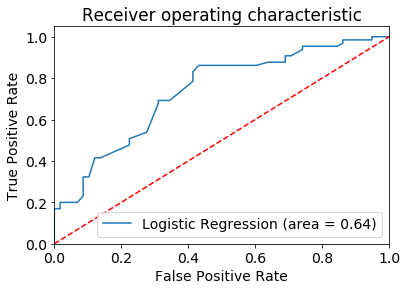

In [90]:
logit_roc_auc = roc_auc_score(Y0_test, logreg.predict(X0_test))
fpr, tpr, thresholds = roc_curve(Y0_test, logreg.predict_proba(X0_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() #ROC curve stays above average line. the model is good.